In [1]:
import pandas as pd
import px_reader as px
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nb_etudiants = read_file('nb-etudiants.px')
nb_etudiants.index.names = ['annee', 'filiere', 'nationalite']
nb_etudiants.head()

BS   BE   FR  GE  LS   LU  \
annee filiere                         nationalite                               
1993  Theologie protestante           Suisse       105  211    0  50  72    0   
                                      Etranger      63   42    0  32  21    0   
      Theologie catholique-romaine    Suisse         0    0  226   0   0  153   
                                      Etranger       0    0  252   0   0   32   
      Theologie catholique-chretienne Suisse         0    9    0   0   0    0   

                                                   NE SG  UZH USI EPFL ETHZ  \
annee filiere                         nationalite                             
1993  Theologie protestante           Suisse       43  0  227   0    0    0   
                                      Etranger     15  0   38   0    0    0   
      Theologie catholique-romaine    Suisse        0  0    0   0    0    0   
                                      Etranger      0  0    0   0    0    0   
      Theologie catholique-chretienne Suisse        0  0    0   0    0    0   

                                                  Autres IU  
annee filiere                         nationalite            
1993  Theologie protestante           Suisse              0  
                                      Etranger            0  
      Theologie catholique-romaine    Suisse              0  
                                      Etranger            0  
      Theologie catholique-chretienne Suisse              0

In [3]:
type_filiere = list(nb_etudiants.index.get_level_values('filiere').unique())
years = list(nb_etudiants.index.get_level_values('annee').unique())

In [4]:
nb_etudiants = parse_df(nb_etudiants, 3)
nb_etudiants = nb_etudiants.groupby(['annee', 'nationalite']).sum()
nb_etudiants.head()

GE      LS     LU      NE      SG      UZH  USI  \
annee nationalite                                                        
1993  Etranger     4975.0  1935.0   34.0   694.0  1221.0   2145.0  0.0   
      Suisse       8826.0  6550.0  181.0  2484.0  2939.0  16982.0  0.0   
1994  Etranger     4710.0  1975.0   30.0   710.0  1231.0   1873.0  0.0   
      Suisse       8775.0  6756.0  189.0  2522.0  2862.0  14533.0  0.0   
1995  Etranger     4355.0  1985.0   34.0   676.0  1205.0   1858.0  0.0   

                     EPFL    ETHZ  Autres IU  
annee nationalite                             
1993  Etranger     1425.0  1985.0       12.0  
      Suisse       3035.0  9388.0      190.0  
1994  Etranger     1462.0  2225.0       11.0  
      Suisse       3177.0  9467.0      201.0  
1995  Etranger     1440.0  2216.0       11.0

In [5]:
def get_df_for_uni(uni, summarized = True):
    uni_df = pd.DataFrame(columns = ['Etranger', 'Suisse'])
    uni_df.insert(loc=0, column='annee', value=years)
    uni_df = uni_df.set_index('annee')
    tmp_df = nb_etudiants[[uni]]
    for y in years:
        uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
    uni_df['Total'] = uni_df[['Etranger', 'Suisse']].sum(axis=1)
    return uni_df

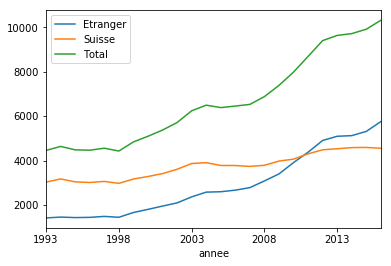

In [7]:
tmp_df = get_df_for_uni('EPFL')
tmp_df.plot(kind = 'line', logy = False)